## MNIST

This is my own solution for the exercise problem #1 of chapter 3

## Load MNIST dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [ ]:
X, y = mnist["data"], mnist["target"]

print(X.shape)
print(y.shape)

In [ ]:
# split data into train, test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

In [ ]:
# automize preprocessing process using scikit-learn's pipeline feature
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

mnist_pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])

In [ ]:
X_train = mnist_pipeline.fit_transform(X_train)

In [ ]:
some_digit = X_train[0].reshape(28, 28)

In [8]:
import matplotlib.pyplot as plt
import copy

# implement utility function for viewing image
def show_mnist_784(mnist_digit):
    digit = copy.deepcopy(mnist_digit)
    if digit.shape is not (28, 28):
        digit.reshape(28, 28)
    plt.imshow(digit, cmap="binary")
    plt.axis("off")
    plt.show()  

In [ ]:
# use KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

In [10]:
# investigate cross validation score of the model
from sklearn.model_selection import cross_val_score

# run training using default parameters
knc_scores = cross_val_score(knc, X_train, y_train, cv=5, scoring="neg_mean_squared_error")

In [11]:
from sklearn.model_selection import cross_val_predict

knc_predict = cross_val_predict(knc, X_train, y_train, cv=5)

In [12]:
from sklearn.metrics import f1_score

f1_score(y_train, knc_predict, average="macro")

0.9690384587621755

In [13]:
# investigate confusion matrix
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, knc_predict)

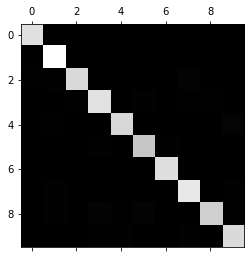

In [14]:
# draw raw-confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

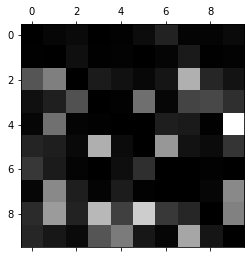

In [15]:
# for better analysis, we should calculate the error rate in each classes seperately
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Grid Search

So, we just saw that the model of our choice seems quite promising. 

And we decided to continue working with this model while improving performance by tweaking its parameters.

It's time to do grid search!

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}


knc = KNeighborsClassifier()

randomized_search = RandomizedSearchCV(knc, param_grid, n_iter=3, scoring="neg_mean_squared_error", return_train_score=True, verbose=5)

randomized_search.fit(X_train, y_train)

In [ ]:
randomized_search.best_params_